In [77]:
from google.cloud import bigquery
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")


In [12]:
client = bigquery.Client(project="movie-etl-pipeline")

In [19]:
query = """
SELECT *
FROM `movie-etl-pipeline.movies.cleaned_movies`
"""

df = client.query(query).to_dataframe()
df.head()

E0000 00:00:1758823191.903374 2333618 alts_credentials.cc:93] ALTS creds ignored. Not running on GCP and untrusted ALTS is not enabled.


,rating_percent,language_full,release_year,title,vote_count,genre_id,popularity_bucket,id
0,0.0,English,<NA>,Enola Holmes 3,0,12,Low,1202033
1,0.0,English,1912,Fra Diavolo,0,12,Low,625106
2,0.0,English,1912,Under Two Flags,0,12,Low,664676
3,0.0,English,1919,Wings of the Morning,0,12,Low,1508820
4,0.0,English,1922,The Love Gambler,0,12,Low,959020


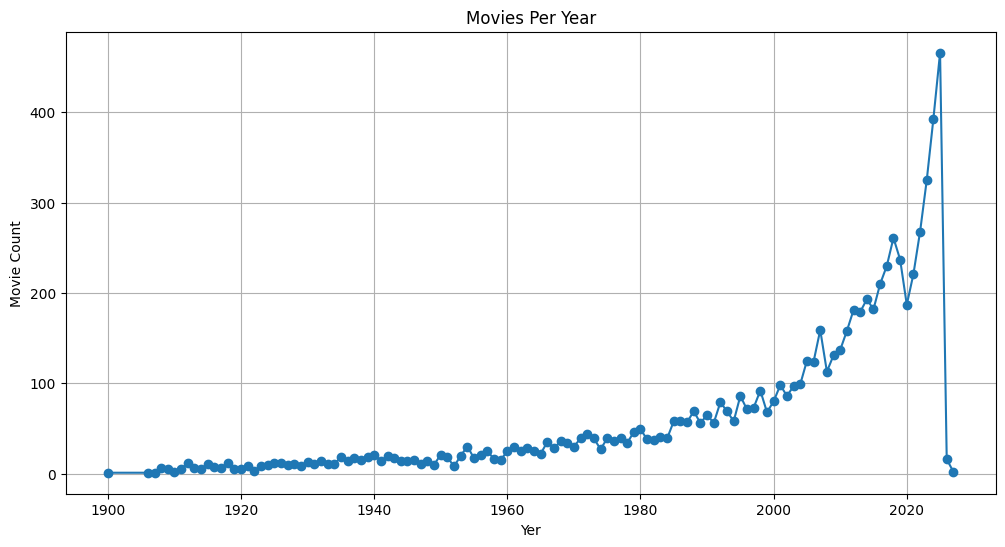

In [15]:
plt.figure(figsize=(12,6))
plt.plot(df["release_year"], df["total_movies"], marker="o")
plt.title("Movies Per Year")
plt.xlabel("Yer")
plt.ylabel("Movie Count")
plt.grid(True)
plt.show()

In [16]:
query = """
SELECT 
  language_full, 
  AVG(rating_percent) AS avg_rating, 
  COUNT(*) AS movie_count
FROM `movie-etl-pipeline.movies.cleaned_movies`
GROUP BY language_full
ORDER BY avg_rating DESC
"""

df_lang = client.query(query).to_dataframe()
df_lang

E0000 00:00:1758822626.136905 2333618 alts_credentials.cc:93] ALTS creds ignored. Not running on GCP and untrusted ALTS is not enabled.


,language_full,avg_rating,movie_count
0,Other,109080.117649,1805
1,English,39608.615792,5102
2,Japanese,59.385693,267
3,French,50.522938,354


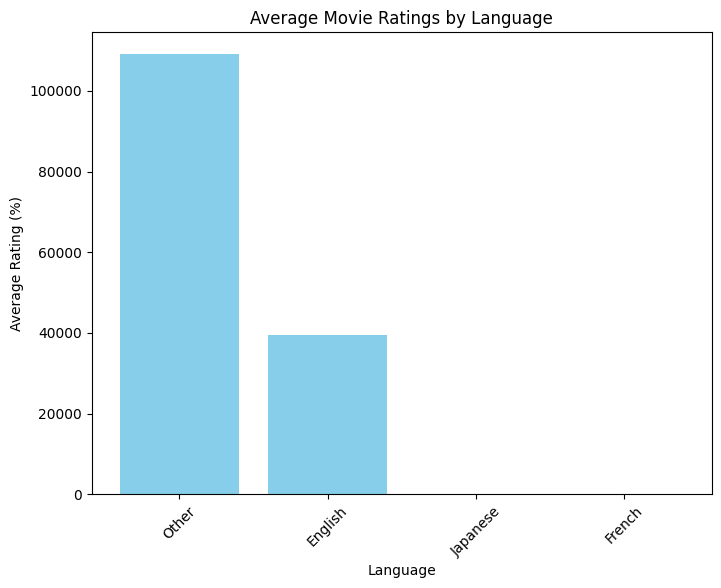

In [17]:
plt.figure(figsize=(8,6))
plt.bar(df_lang["language_full"], df_lang["avg_rating"], color="skyblue")
plt.title("Average Movie Ratings by Language")
plt.xlabel("Language")
plt.ylabel("Average Rating (%)")
plt.xticks(rotation=45)
plt.show()

In [24]:
query = """
SELECT 
  release_year, 
  COUNT(*) AS movie_count
FROM `movie-etl-pipeline.movies.cleaned_movies`
GROUP BY release_year
ORDER BY release_year
"""

df1 = client.query(query).to_dataframe()
df1


E0000 00:00:1758823375.150333 2333618 alts_credentials.cc:93] ALTS creds ignored. Not running on GCP and untrusted ALTS is not enabled.


,release_year,movie_count
0,<NA>,39
1,1900,1
2,1906,1
3,1907,1
4,1908,6
...,...,...
119,2023,325
120,2024,393
121,2025,466
122,2026,16


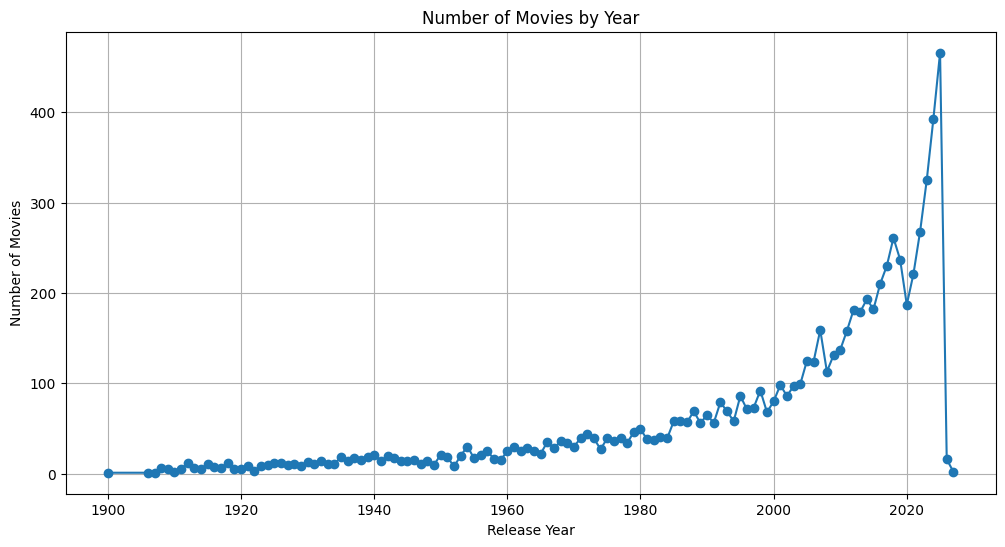

In [25]:
plt.figure(figsize=(12,6))
plt.plot(df1["release_year"], df1["movie_count"], marker="o")
plt.title("Number of Movies by Year")
plt.xlabel("Release Year")
plt.ylabel("Number of Movies")
plt.grid(True)
plt.show()

In [ ]:
query = """
SELECT language_full, AVG(rating_percent) as average_rating
FROM `movie-etl-pipeline.movies.cleaned_movies`
GROUP BY language_full
"""

df2 = client.query(query).to_dataframe()
df2




E0000 00:00:1758823534.942171 2333618 alts_credentials.cc:93] ALTS creds ignored. Not running on GCP and untrusted ALTS is not enabled.


,language_full,f0_
0,English,39608.615792
1,French,50.522938
2,Other,109080.117649
3,Japanese,59.385693


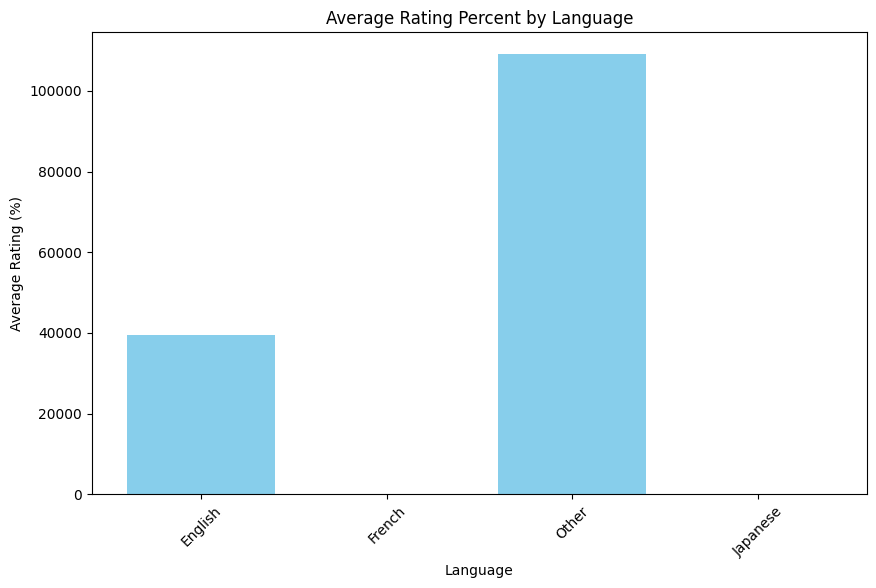

In [33]:
plt.figure(figsize=(10,6))
plt.bar(df2["language_full"], df2["f0_"], color="skyblue")
plt.title("Average Rating Percent by Language")
plt.xlabel("Language")
plt.ylabel("Average Rating (%)")
plt.xticks(rotation=45)
plt.show()


In [34]:
query = """
SELECT release_year, AVG(rating_percent)
FROM `movie-etl-pipeline.movies.cleaned_movies`
WHERE release_year > 2000
GROUP BY release_year
"""

df3 = client.query(query).to_dataframe()
df3

E0000 00:00:1758823998.674777 2333618 alts_credentials.cc:93] ALTS creds ignored. Not running on GCP and untrusted ALTS is not enabled.


,release_year,f0_
0,2001,58.075000
1,2002,61.466395
2,2003,55.657423
3,2004,59.956869
4,2005,55.540160
5,2006,57.063065
6,2007,56.411509
7,2008,55.349912
8,2009,56.472824
9,2010,57.619343


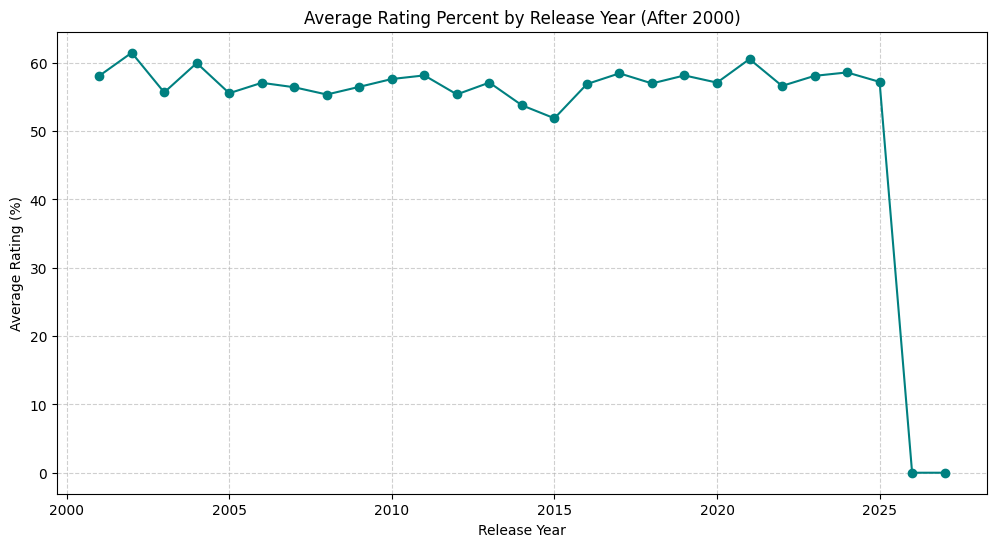

In [35]:
plt.figure(figsize=(12,6))
plt.plot(df3["release_year"], df3["f0_"], marker="o", linestyle="-", color="teal")
plt.title("Average Rating Percent by Release Year (After 2000)")
plt.xlabel("Release Year")
plt.ylabel("Average Rating (%)")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

In [43]:

query = """
(SELECT popularity_bucket, AVG(rating_percent) as average_rating FROM `movie-etl-pipeline.movies.cleaned_movies`
GROUP BY popularity_bucket) as m
ORDER BY average_rating DESC 
LIMIT 1;
"""
df4 = client.query(query).to_dataframe()
df4

E0000 00:00:1758824618.294927 2333618 alts_credentials.cc:93] ALTS creds ignored. Not running on GCP and untrusted ALTS is not enabled.


,popularity_bucket,average_rating
0,High,4.484538e+06


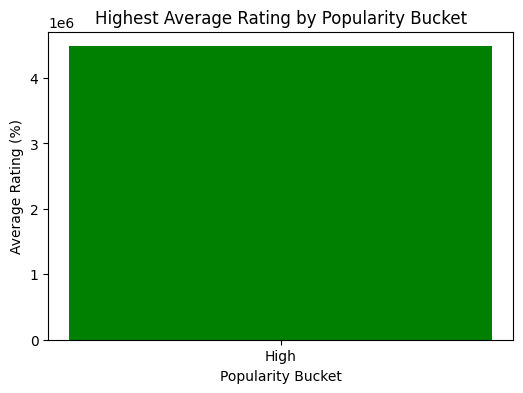

In [47]:
plt.figure(figsize=(6,4))
plt.bar(df4["popularity_bucket"], df4["average_rating"], color="green")
plt.title("Highest Average Rating by Popularity Bucket")
plt.xlabel("Popularity Bucket")
plt.ylabel("Average Rating (%)")
plt.show()

In [50]:
query = """
SELECT 
  FLOOR(release_year/10)*10 AS decade,
  AVG(rating_percent) AS avg_rating
FROM `movie-etl-pipeline.movies.cleaned_movies`
WHERE release_year IS NOT NULL
GROUP BY decade
ORDER BY decade;
"""

df5 = client.query(query).to_dataframe()
df5


E0000 00:00:1758825003.953000 2333618 alts_credentials.cc:93] ALTS creds ignored. Not running on GCP and untrusted ALTS is not enabled.


,decade,avg_rating
0,1900.0,34.214286
1,1910.0,14.633803
2,1920.0,25.198588
3,1930.0,38.512042
4,1940.0,44.985705
5,1950.0,49.715864
6,1960.0,47.061080
7,1970.0,45.601314
8,1980.0,49.801474
9,1990.0,54.168159


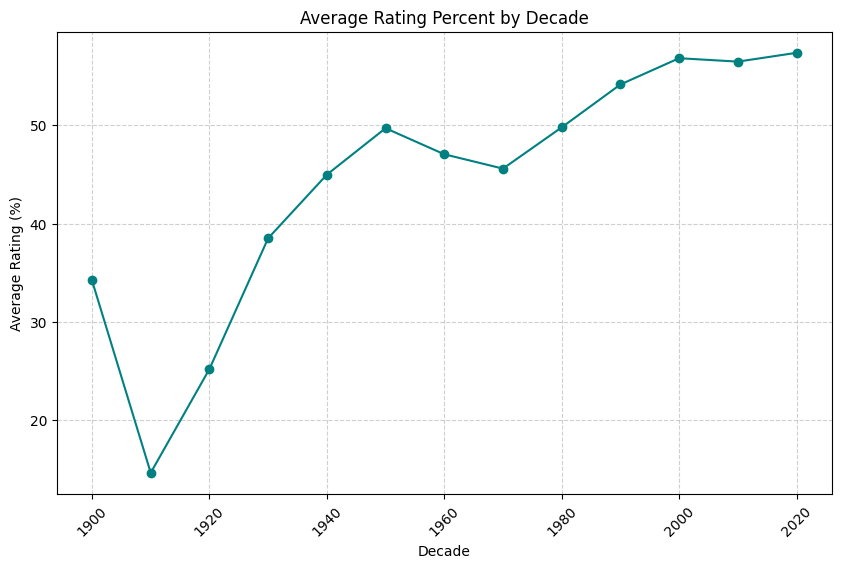

In [54]:
plt.figure(figsize=(10,6))
plt.plot(df5["decade"], df5["avg_rating"], marker="o", color="teal")
plt.title("Average Rating Percent by Decade")
plt.xlabel("Decade")
plt.ylabel("Average Rating (%)")
plt.xticks(rotation=45)
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

In [57]:
query = """
SELECT FLOOR(release_year/10)*10 AS decade, COUNT(*)
FROM `movie-etl-pipeline.movies.cleaned_movies`
GROUP BY decade
ORDER BY decade DESC
"""

df6 = client.query(query).to_dataframe()
df6


E0000 00:00:1758825161.624316 2333618 alts_credentials.cc:93] ALTS creds ignored. Not running on GCP and untrusted ALTS is not enabled.


,decade,f0_
0,2020.0,1878
1,2010.0,1968
2,2000.0,1112
3,1990.0,717
4,1980.0,502
5,1970.0,373
6,1960.0,287
7,1950.0,191
8,1940.0,149
9,1930.0,142


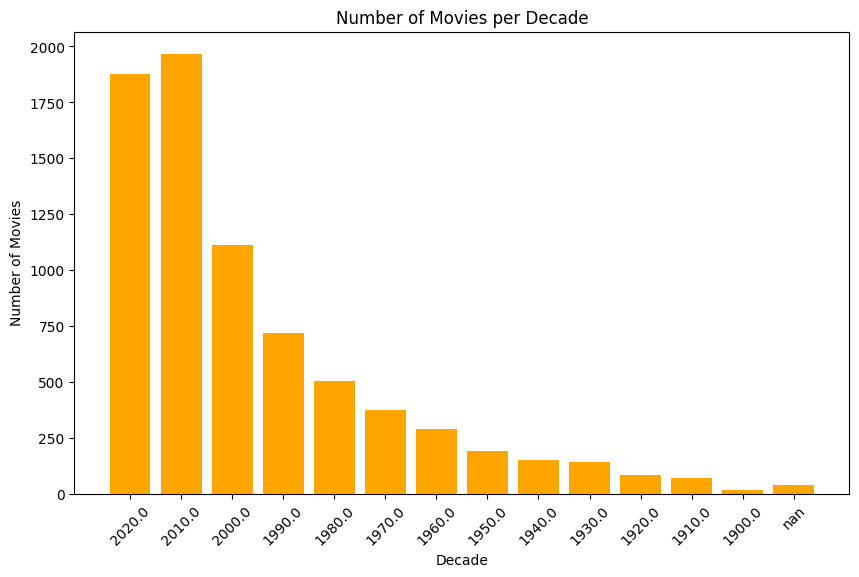

In [ ]:
plt.figure(figsize=(10,6))
plt.bar(df6["decade"].astype(str), df6["f0_"], color="orange")
plt.title("Number of Movies per Decade")
plt.xlabel("Decade")
plt.ylabel("Number of Movies")
plt.xticks(rotation=45)
plt.show()

In [62]:
query = """
SELECT language_full, COUNT(*) AS total_movies, AVG(rating_percent) AS average_rating
FROM `movie-etl-pipeline.movies.cleaned_movies`
GROUP BY language_full
ORDER BY AVG(rating_percent), language_full DESC
"""

df7 = client.query(query).to_dataframe()
df7


E0000 00:00:1758826560.844742 2333618 alts_credentials.cc:93] ALTS creds ignored. Not running on GCP and untrusted ALTS is not enabled.


,language_full,total_movies,average_rating
0,French,354,50.522938
1,Japanese,267,59.385693
2,English,5102,39608.615792
3,Other,1805,109080.117649


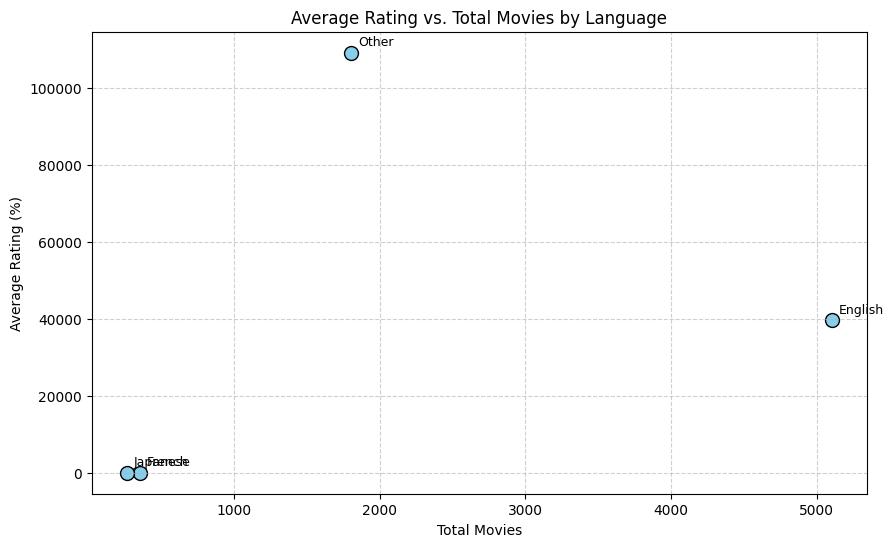

In [63]:
plt.figure(figsize=(10,6))
plt.scatter(df7["total_movies"], df7["average_rating"], s=100, color="skyblue", edgecolor="black")

for i, txt in enumerate(df7["language_full"]):
    plt.annotate(txt, (df7["total_movies"][i], df7["average_rating"][i]), fontsize=9, xytext=(5,5), textcoords="offset points")

plt.title("Average Rating vs. Total Movies by Language")
plt.xlabel("Total Movies")
plt.ylabel("Average Rating (%)")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


In [64]:
query = """

SELECT language_full, AVG(rating_percent) AS average_rating
FROM `movie-etl-pipeline.movies.cleaned_movies`
Where release_year > 2000
GROUP BY language_full
ORDER BY average_rating DESC 
LIMIT 1

"""

df8 = client.query(query).to_dataframe()
df8


E0000 00:00:1758827037.981661 2333618 alts_credentials.cc:93] ALTS creds ignored. Not running on GCP and untrusted ALTS is not enabled.


,language_full,average_rating
0,Japanese,65.733851


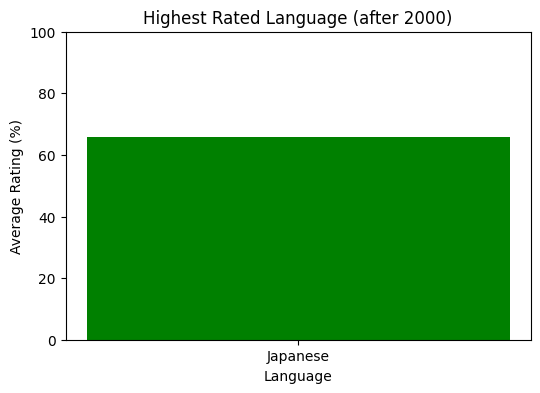

In [ ]:
plt.figure(figsize=(6,4))
plt.bar(df8["language_full"], df8["average_rating"], color="green")
plt.title("Highest Rated Language (after 2000)")
plt.xlabel("Language")
plt.ylabel("Average Rating (%)")
plt.ylim(0, 100)  
plt.show()

In [66]:
query = """

SELECT popularity_bucket, COUNT(*) AS total_movies, AVG(rating_percent) AS average_rating 
FROM `movie-etl-pipeline.movies.cleaned_movies`
GROUP BY popularity_bucket

"""

df9 = client.query(query).to_dataframe()
df9


E0000 00:00:1758827335.602231 2333618 alts_credentials.cc:93] ALTS creds ignored. Not running on GCP and untrusted ALTS is not enabled.


,popularity_bucket,total_movies,average_rating
0,Low,7334,2.688739e+04
1,Medium,149,6.841597e+01
2,High,45,4.484538e+06


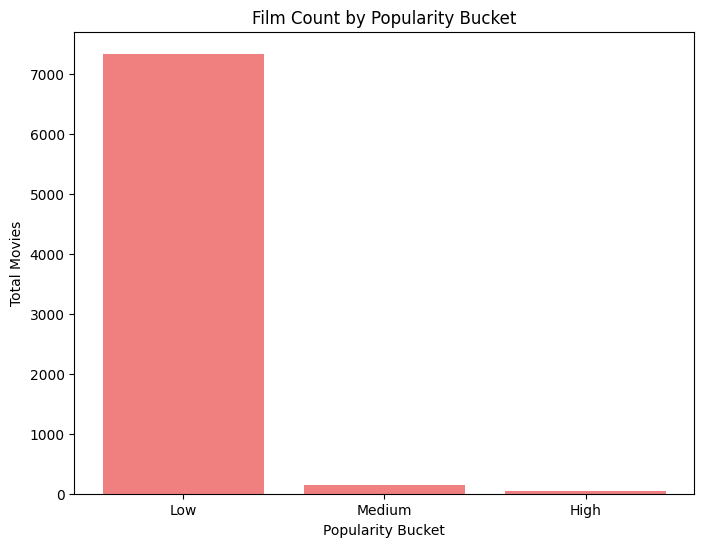

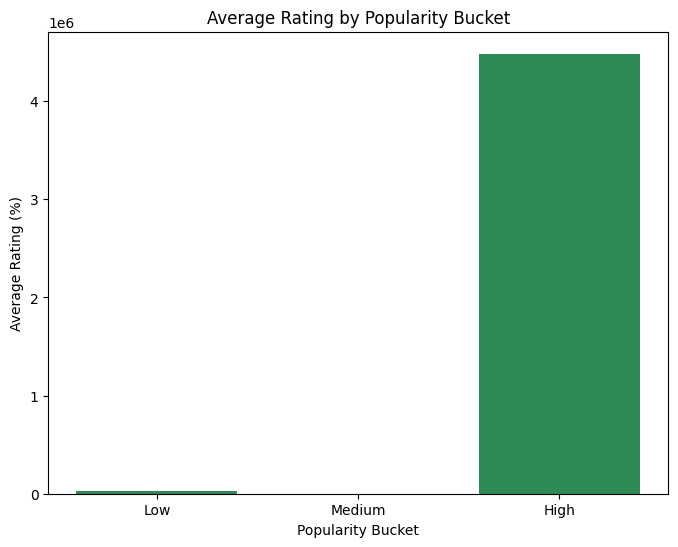

In [67]:
plt.figure(figsize=(8,6))

# Film sayılarını bar chart
plt.bar(df9["popularity_bucket"], df9["total_movies"], color="lightcoral")
plt.title("Film Count by Popularity Bucket")
plt.xlabel("Popularity Bucket")
plt.ylabel("Total Movies")
plt.show()

# Ortalama rating için bar chart
plt.figure(figsize=(8,6))
plt.bar(df9["popularity_bucket"], df9["average_rating"], color="seagreen")
plt.title("Average Rating by Popularity Bucket")
plt.xlabel("Popularity Bucket")
plt.ylabel("Average Rating (%)")
plt.show()


In [71]:
query = """

SELECT 
  language_full, 
  popularity_bucket, 
  COUNT(*) AS total_movies, 
  AVG(rating_percent) AS average_rating
FROM `movie-etl-pipeline.movies.cleaned_movies`
GROUP BY language_full, popularity_bucket
ORDER BY average_rating DESC
LIMIT 1

"""

df10 = client.query(query).to_dataframe()
df10


E0000 00:00:1758828487.606256 2333618 alts_credentials.cc:93] ALTS creds ignored. Not running on GCP and untrusted ALTS is not enabled.


,language_full,popularity_bucket,total_movies,average_rating
0,English,High,30,6.726773e+06


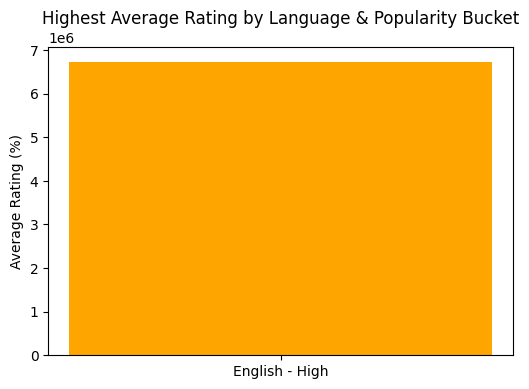

In [72]:
row = df10.iloc[0]

labels = [f"{row['language_full']} - {row['popularity_bucket']}"]
values = [row['average_rating']]

plt.figure(figsize=(6,4))
plt.bar(labels, values, color="orange")
plt.title("Highest Average Rating by Language & Popularity Bucket")
plt.ylabel("Average Rating (%)")
plt.show()

In [74]:
query = """
SELECT popularity_bucket,language_full, AVG(rating_percent) AS average_rating, COUNT(*) AS total_movies
FROM `movie-etl-pipeline.movies.cleaned_movies`
GROUP BY popularity_bucket, language_full

"""

df11 = client.query(query).to_dataframe()
df11


E0000 00:00:1758828909.302155 2333618 alts_credentials.cc:93] ALTS creds ignored. Not running on GCP and untrusted ALTS is not enabled.


,popularity_bucket,language_full,average_rating,total_movies
0,Low,English,5.493174e+01,4973
1,Low,French,5.042199e+01,351
2,Low,Other,1.123779e+05,1752
3,Low,Japanese,5.897543e+01,258
4,Medium,English,6.857727e+01,99
5,High,Other,6.518545e+01,11
6,High,English,6.726773e+06,30
7,Medium,Japanese,6.874000e+01,6
8,High,Japanese,7.596000e+01,3
9,Medium,Other,6.810452e+01,42


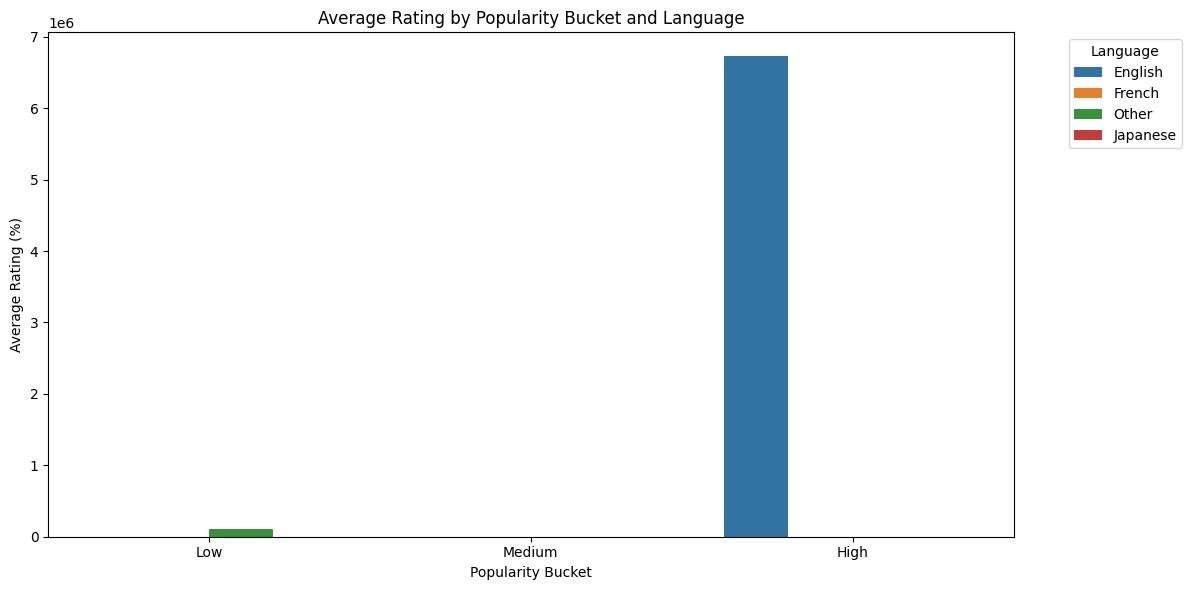

In [78]:
plt.figure(figsize=(12,6))
sns.barplot(
    data=df11,
    x="popularity_bucket",
    y="average_rating",
    hue="language_full"
)

plt.title("Average Rating by Popularity Bucket and Language")
plt.xlabel("Popularity Bucket")
plt.ylabel("Average Rating (%)")
plt.legend(title="Language", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [109]:
query = """

SELECT 
  language_full,
  AVG(rating_percent) AS average_rating,
  (SELECT AVG(rating_percent) FROM `movie-etl-pipeline.movies.cleaned_movies`) AS global_average,
  AVG(rating_percent) - (SELECT AVG(rating_percent) FROM `movie-etl-pipeline.movies.cleaned_movies`) AS difference_from_global
FROM `movie-etl-pipeline.movies.cleaned_movies`
GROUP BY language_full
ORDER BY difference_from_global DESC;

"""

df12 = client.query(query).to_dataframe()
df12


E0000 00:00:1758830952.840107 2333618 alts_credentials.cc:93] ALTS creds ignored. Not running on GCP and untrusted ALTS is not enabled.


,language_full,average_rating,global_average,difference_from_global
0,Other,109080.117649,53002.990333,56077.127316
1,English,39608.615792,53002.990333,-13394.374541
2,Japanese,59.385693,53002.990333,-52943.604640
3,French,50.522938,53002.990333,-52952.467395


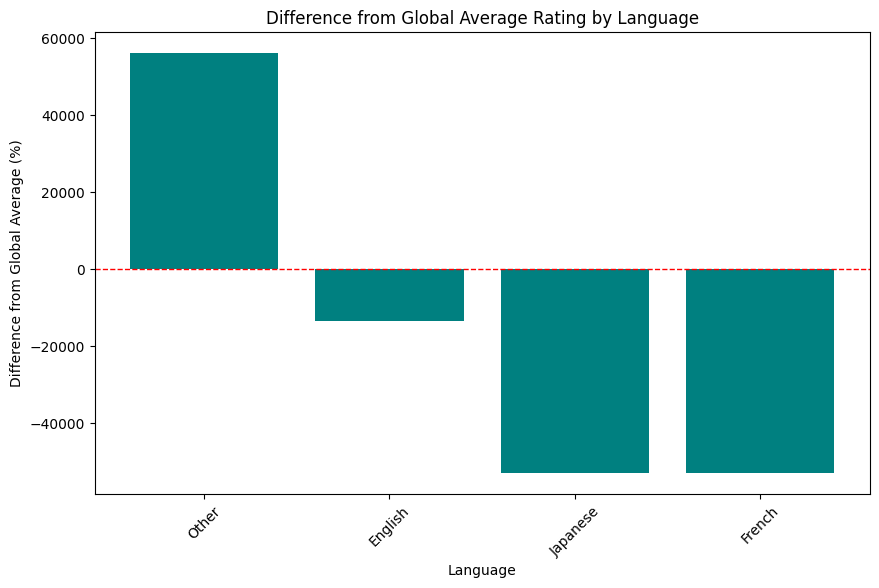

In [110]:
plt.figure(figsize=(10,6))
plt.bar(df12["language_full"], df12["difference_from_global"], color="teal")
plt.axhline(0, color="red", linestyle="--", linewidth=1) 
plt.title("Difference from Global Average Rating by Language")
plt.xlabel("Language")
plt.ylabel("Difference from Global Average (%)")
plt.xticks(rotation=45)
plt.show()
